## Cluster Analysis

Objective: Introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


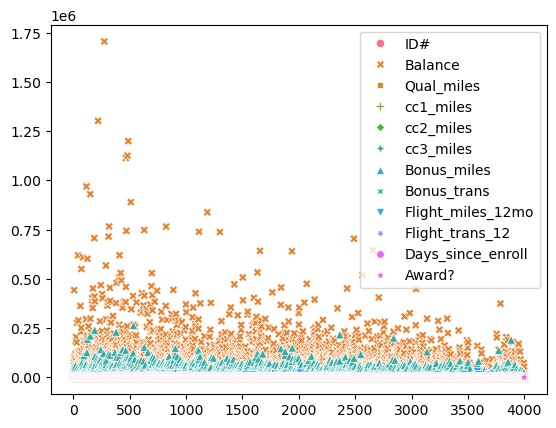

In [3]:
sns.scatterplot(data=df)
plt.show()

### Data Preprocessing

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
## Find outliers and remove them

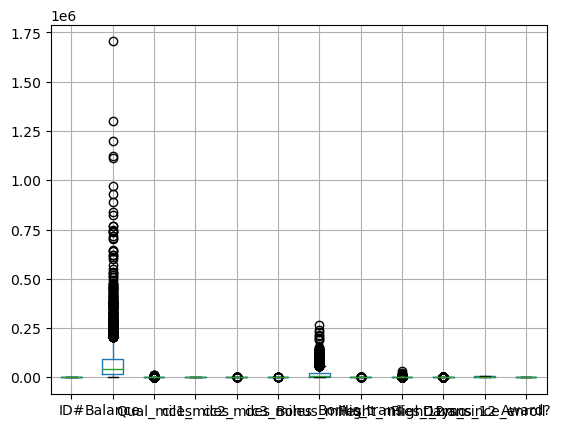

In [6]:
df.boxplot()
plt.show()

In [7]:
## Find inter quantile range to remove outliers
Q1=df['Balance'].quantile(.25)
Q3=df['Balance'].quantile(.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

18527.5 92404.0 73876.5


In [8]:
lower_extreme=Q1-1.5*IQR
upper_extreme=Q3+1.5*IQR
print(lower_extreme,upper_extreme)

-92287.25 203218.75


In [9]:
outliers=df[(df['Balance']<lower_extreme) | (df['Balance']>upper_extreme)]

In [10]:
df = df[(df['Balance'] >= lower_extreme) & (df['Balance'] <= upper_extreme)]
print("DataFrame without outliers:")
print(df)

DataFrame without outliers:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   


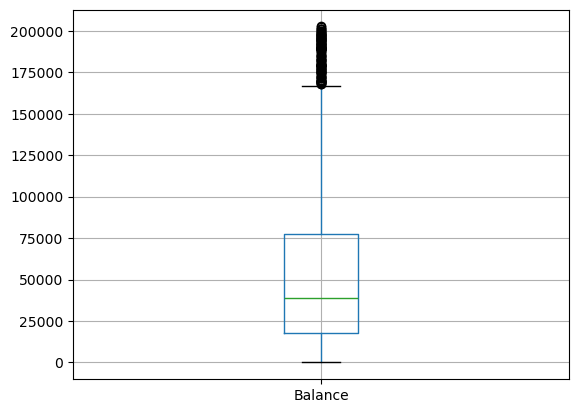

In [11]:
df.boxplot('Balance')
plt.show()

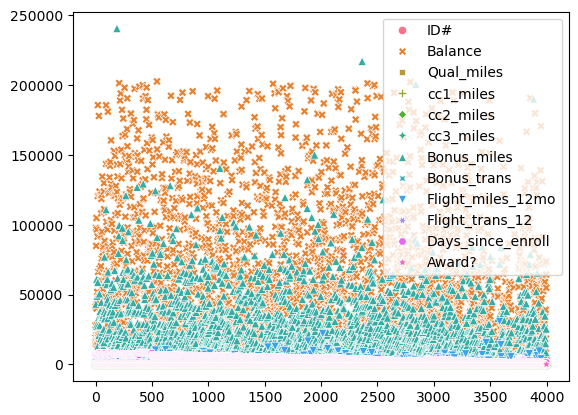

In [12]:
## After removal of outliers
sns.scatterplot(data=df)
plt.show()

## K-Means

In [13]:
features=df.drop(columns='ID#')

In [14]:
kmeans= KMeans(n_clusters=2)

In [15]:
cluster=kmeans.fit(features)
cluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [16]:
np.unique(cluster.labels_)

array([0, 1])

In [17]:
df['clusters']= cluster.labels_

In [18]:
df[df.clusters==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,3969,139032,0,3,1,1,19565,17,1150,4,1481,0,0
3949,3972,170632,0,1,1,1,4650,3,0,0,1480,0,0
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,0
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0


In [19]:
## Clusters 

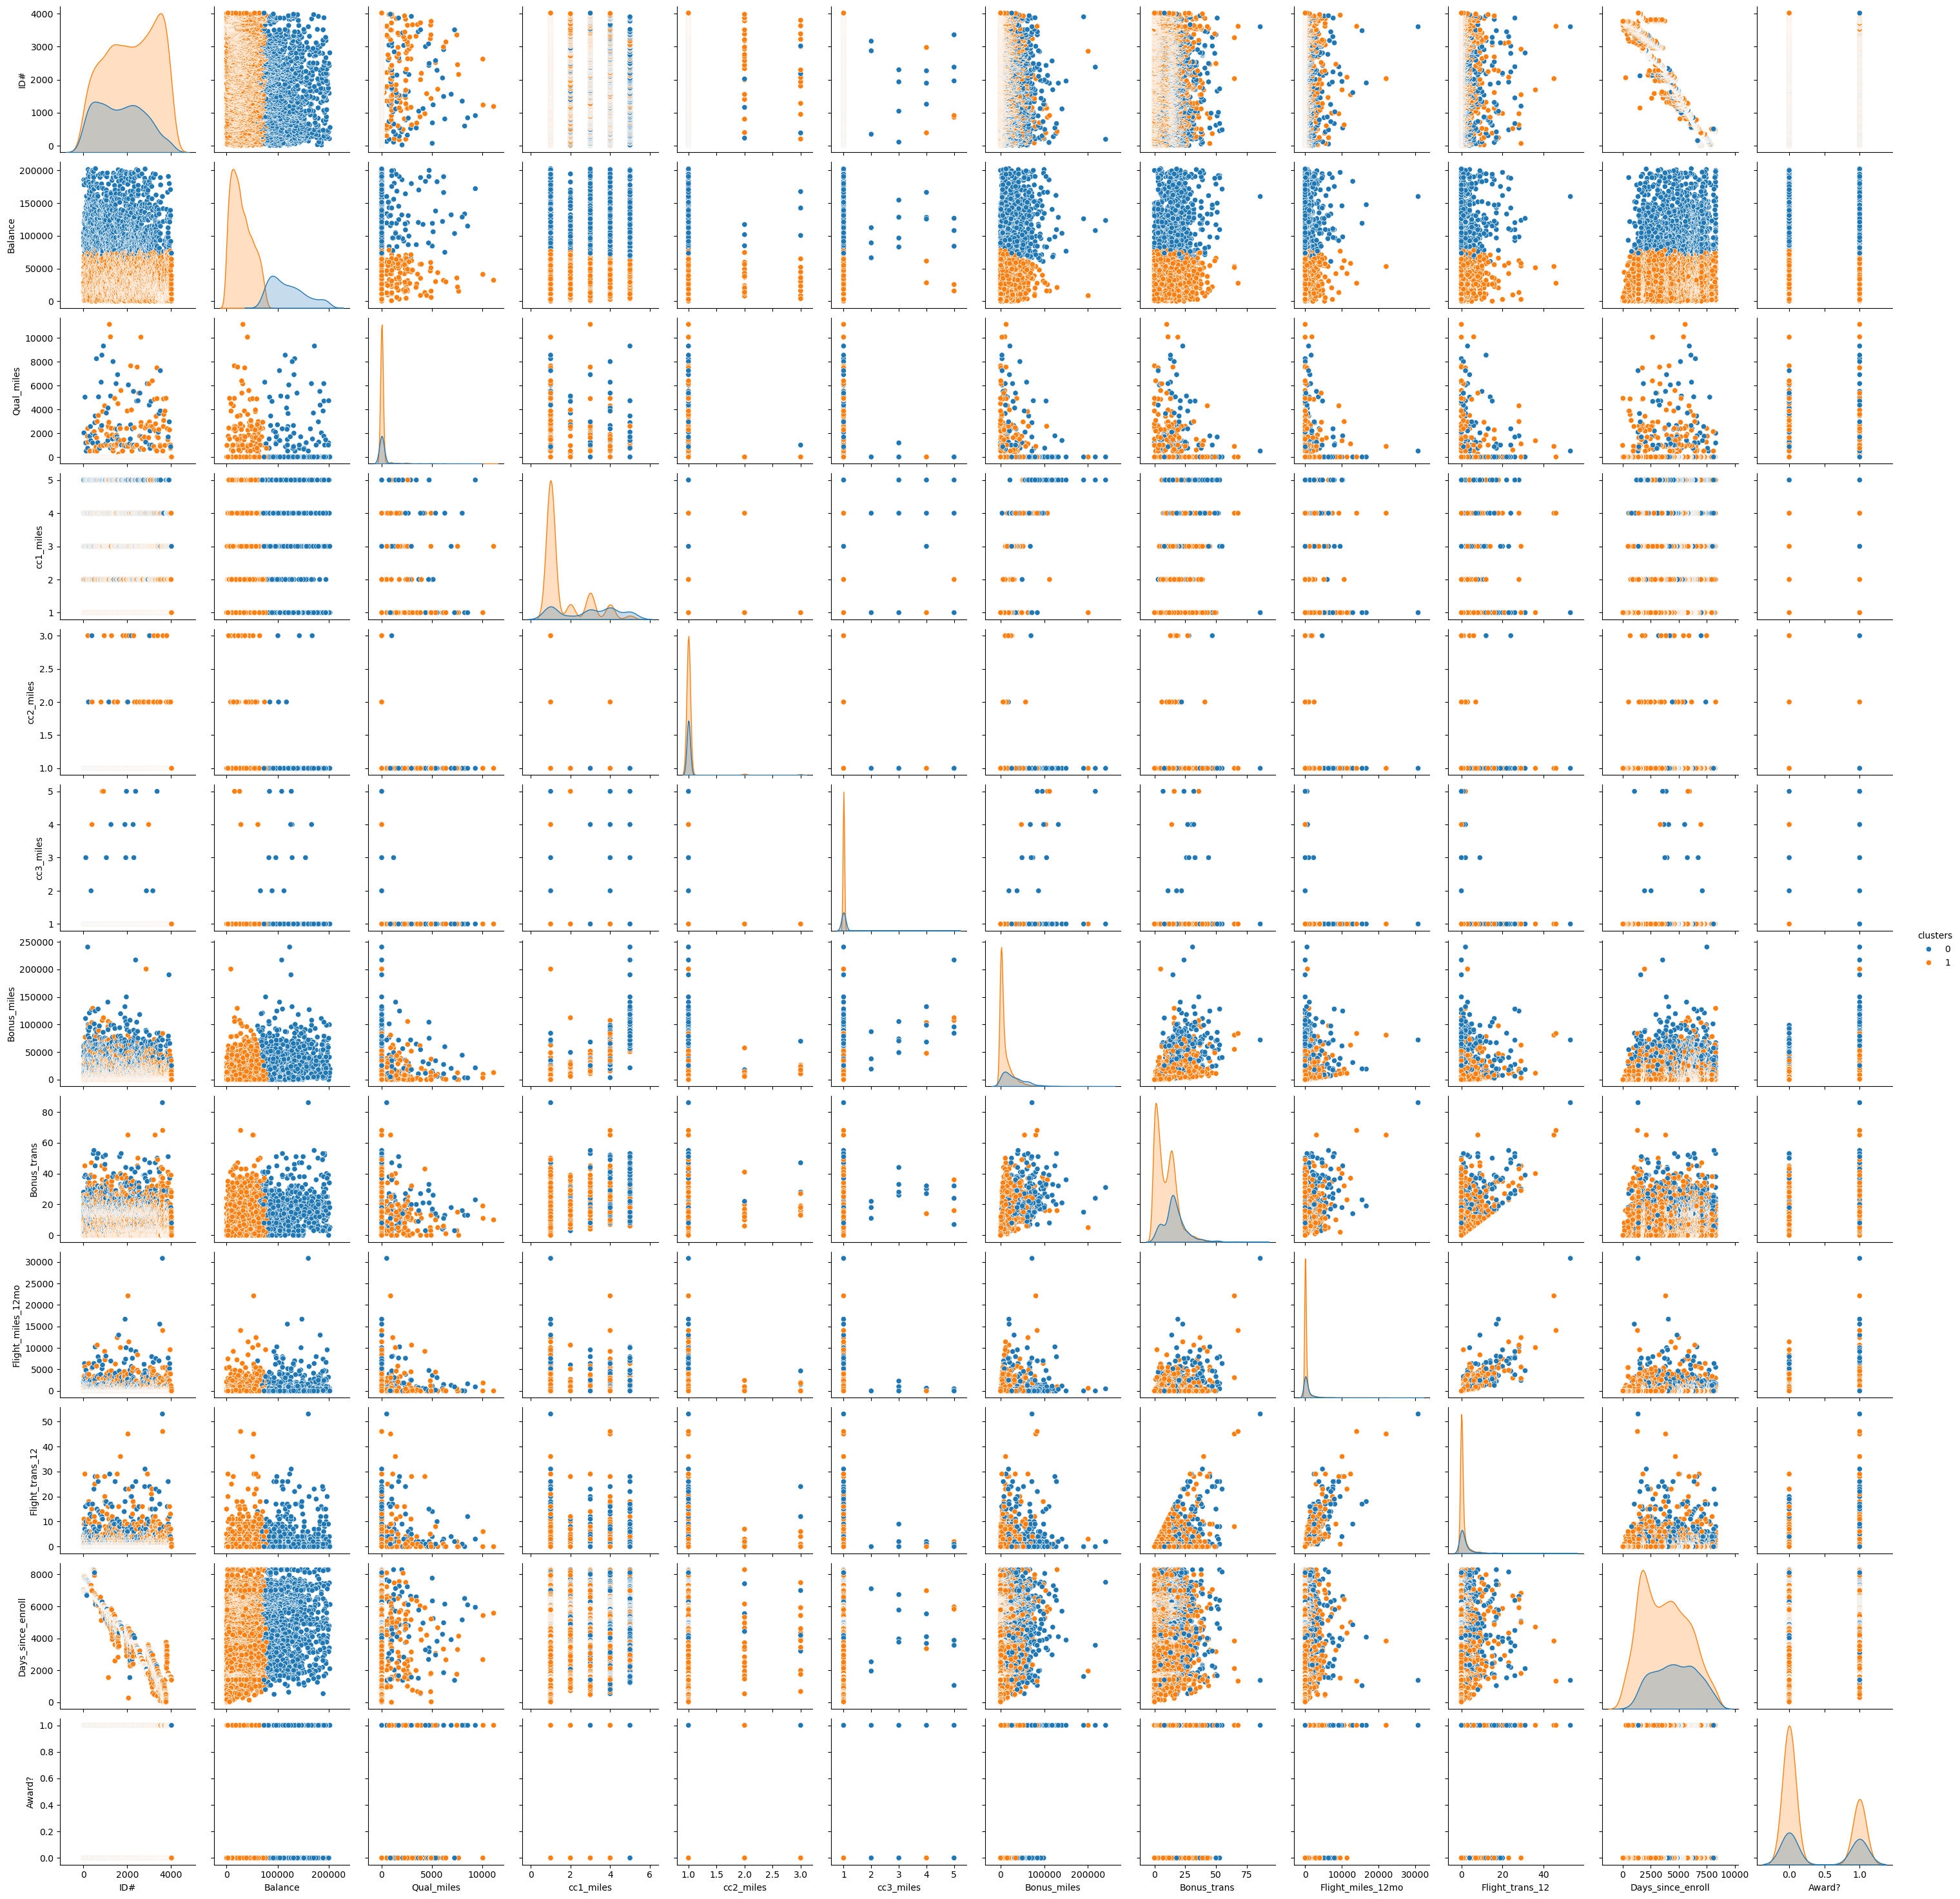

In [20]:
sns.pairplot(data=df, hue='clusters')

In [21]:
## Elbow method
clusters= range(1,11)

In [22]:
inertia=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

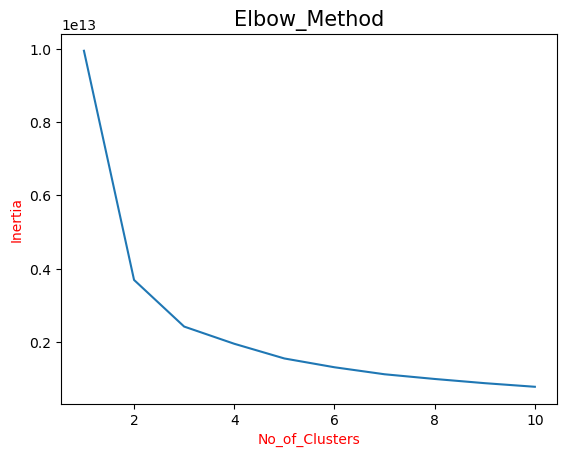

In [23]:
import matplotlib.pyplot as plt
plt.plot(clusters,inertia)
plt.xlabel('No_of_Clusters',size=10,color='red')
plt.ylabel('Inertia',size=10,color='red')
plt.title('Elbow_Method',size=15,color='black');

In [24]:
silhouette_score(features,cluster.labels_)

0.5991945743927004

## Hierarchial_Clustering

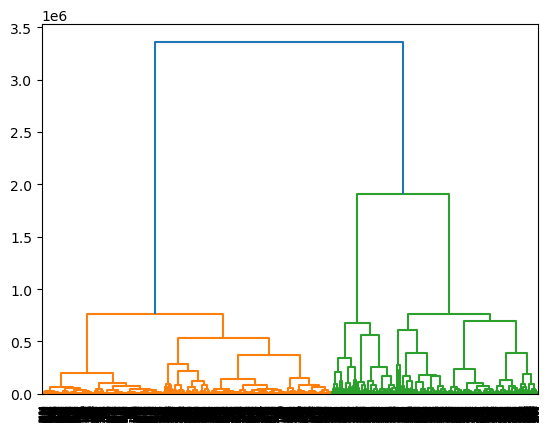

In [25]:
dendrogram= sch.dendrogram(sch.linkage(features,method='ward'))

In [26]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [27]:
clusters= agg.fit(features)

In [28]:
clusters.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
silhouette_score(features,clusters.labels_)

0.5215210309035787

## DBSCAN

In [30]:
std_sca= StandardScaler()

In [31]:
df_new= pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-1.791347,-0.547370,-0.175597,-0.743755,-0.098108,-0.062864,-0.710365,-1.079479,-0.305937,-0.344781,1.458561,-0.740053,0.605722
1,-1.790481,-0.736986,-0.175597,-0.743755,-0.098108,-0.062864,-0.708443,-0.972405,-0.305937,-0.344781,1.442919,-0.740053,0.605722
2,-1.789615,-0.265875,-0.175597,-0.743755,-0.098108,-0.062864,-0.525257,-0.758259,-0.305937,-0.344781,1.475181,-0.740053,0.605722
3,-1.788749,-0.832188,-0.175597,-0.743755,-0.098108,-0.062864,-0.695084,-1.079479,-0.305937,-0.344781,1.435097,-0.740053,0.605722
4,-1.787882,0.935832,-0.175597,1.517188,-0.098108,-0.062864,1.311157,1.597347,1.276393,0.814218,1.426787,1.351255,-1.650924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,1.687482,-0.753350,-0.175597,-0.743755,-0.098108,-0.062864,-0.318914,-0.758259,-0.153570,-0.055031,-1.277427,1.351255,0.605722
3729,1.688348,0.224861,-0.175597,-0.743755,-0.098108,-0.062864,-0.672537,-0.651186,-0.305937,-0.344781,-1.281337,1.351255,0.605722
3730,1.689214,0.421146,-0.175597,0.763540,-0.098108,-0.062864,0.474301,-0.329967,-0.305937,-0.344781,-1.277915,1.351255,-1.650924
3731,1.690080,0.022737,-0.175597,-0.743755,-0.098108,-0.062864,-0.695084,-1.079479,0.074980,-0.055031,-1.278404,-0.740053,0.605722


In [32]:
eps= [1,2,3,4,5]
min_node= range(1,11)

In [33]:
output= []
for i in eps:
    for j in min_node:
        labels= DBSCAN(eps=i,min_samples=j).fit(df_new).labels_
        score= silhouette_score(df_new,labels)
        output.append([i,j,score])

In [34]:
a= pd.DataFrame(output)
score= a.iloc[:,2].max()
score

0.48009608482286564

In [35]:
a[a[2]==score]

,0,1,2
26,3,7,0.480096


In [36]:
# from the above result we can use eps = 2 and mi_samples=10
labels= DBSCAN(eps=2,min_samples=10).fit(df_new).labels_
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

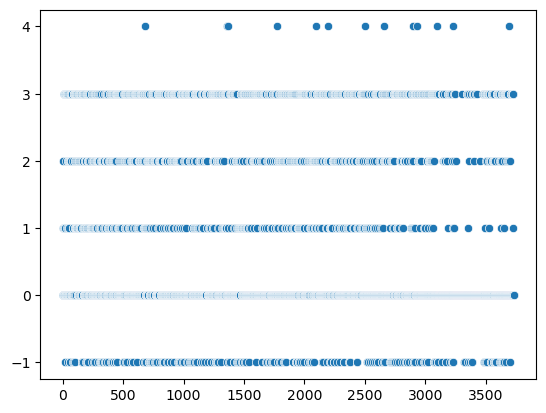

In [37]:
## After clustering
sns.scatterplot(data=labels)
plt.show()